In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[15,10]

In [68]:
df = pd.read_excel("kanish.xlsx")
df.head()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,2,193,3,15,1.949
1,2,193,3,15,1.777
2,2,193,3,15,1.583
3,2,213,4,25,1.692
4,2,213,4,25,1.528


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vol %                   27 non-null     int64  
 1   water pressure (Mpa)    27 non-null     int64  
 2   SOD(mm)                 27 non-null     int64  
 3   Traverse rate (mm/min)  27 non-null     int64  
 4   Ra(output)              27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [70]:
df.corr()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
Vol %,1.000000e+00,-1.944653e-15,7.768335e-16,-2.960595e-17,-0.125076
water pressure (Mpa),-1.944653e-15,1.000000e+00,3.430376e-16,3.619750e-16,0.169651
SOD(mm),7.768335e-16,3.430376e-16,1.000000e+00,-5.518852e-17,0.071034
Traverse rate (mm/min),-2.960595e-17,3.619750e-16,-5.518852e-17,1.000000e+00,-0.044014
Ra(output),-1.250764e-01,1.696506e-01,7.103445e-02,-4.401351e-02,1.000000


In [71]:
df.describe()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.000000,27.00000,27.000000,27.000000
mean,4.000000,213.333333,4.00000,25.000000,1.643444
std,1.664101,17.058722,0.83205,8.320503,0.165939
min,2.000000,193.000000,3.00000,15.000000,1.468000
25%,2.000000,193.000000,3.00000,15.000000,1.525000
50%,4.000000,213.000000,4.00000,25.000000,1.583000
75%,6.000000,234.000000,5.00000,35.000000,1.734500
max,6.000000,234.000000,5.00000,35.000000,2.035000


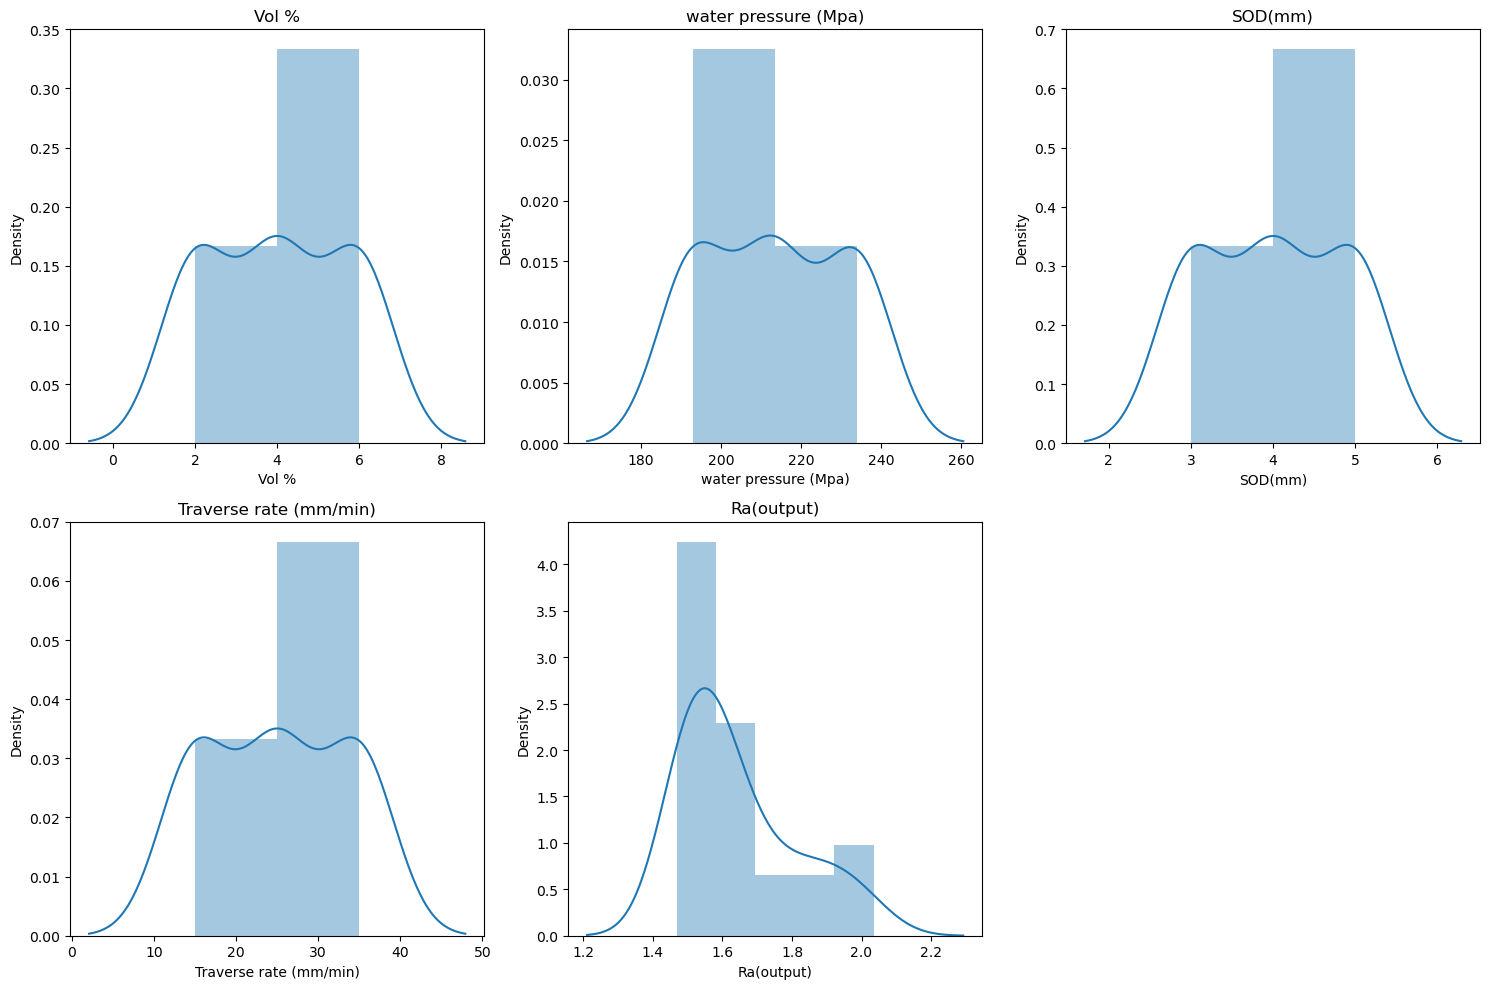

In [6]:
num_cols = df.select_dtypes(exclude='object')
num = num_cols.columns

nrows= 2
ncol = 3
iterator = 1
for i in num:
    plt.subplot(nrows,ncol,iterator)
    sns.distplot(df.loc[:,i],kde=True)
    iterator +=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [7]:
df1 = df.copy(deep=True)

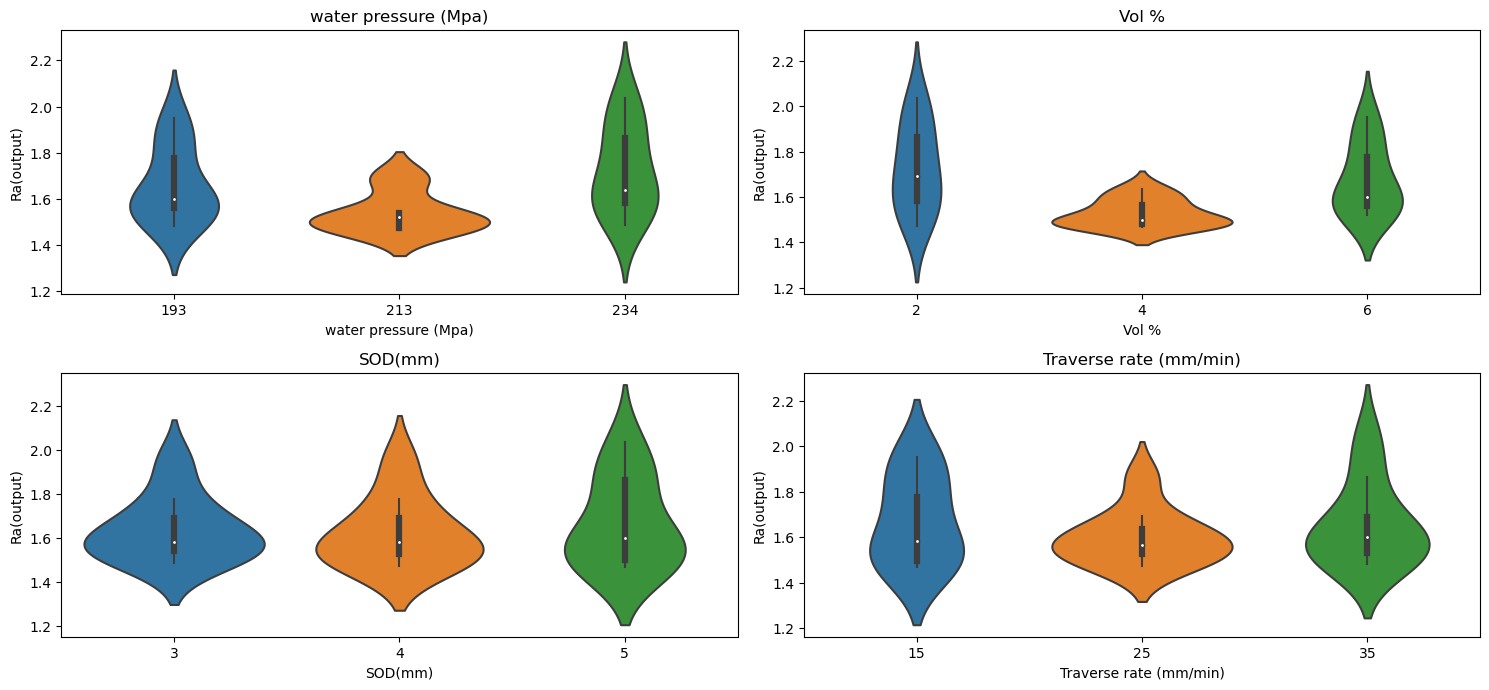

In [8]:
plt.rcParams["figure.figsize"]=[15,10]
cols = ["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']
nrows= 3
ncol = 2
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df[i],y=df['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

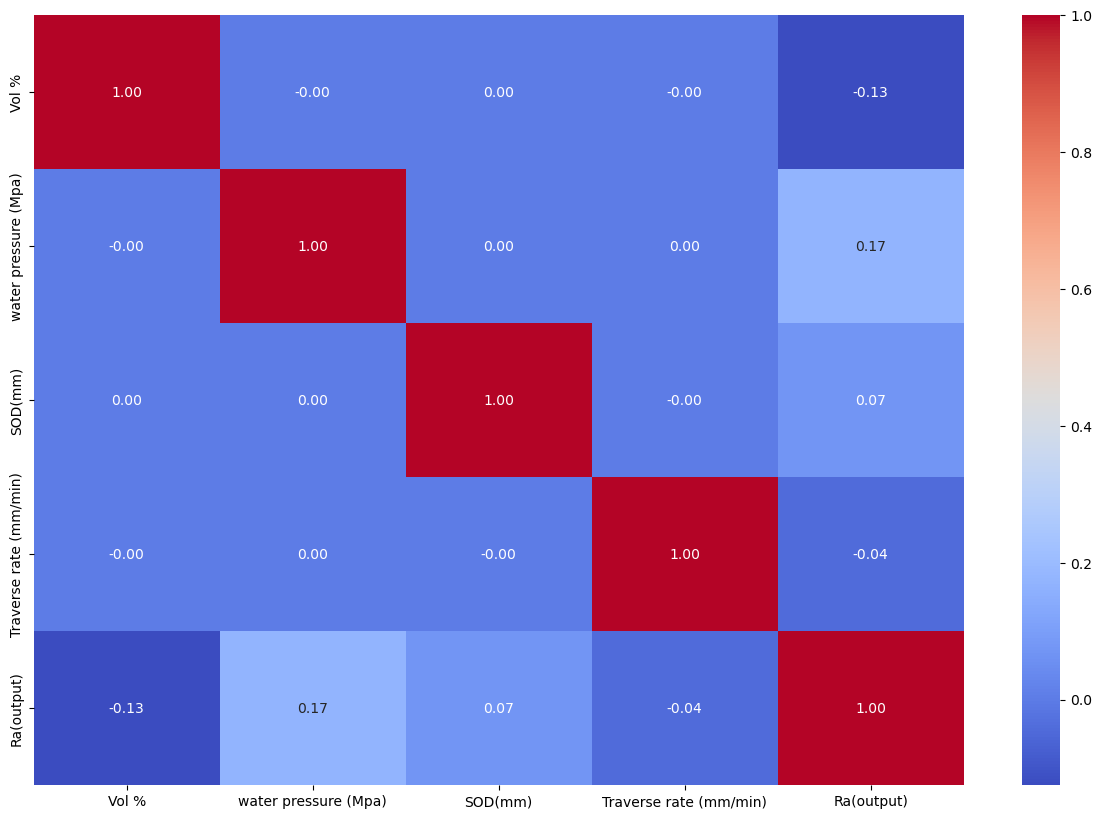

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

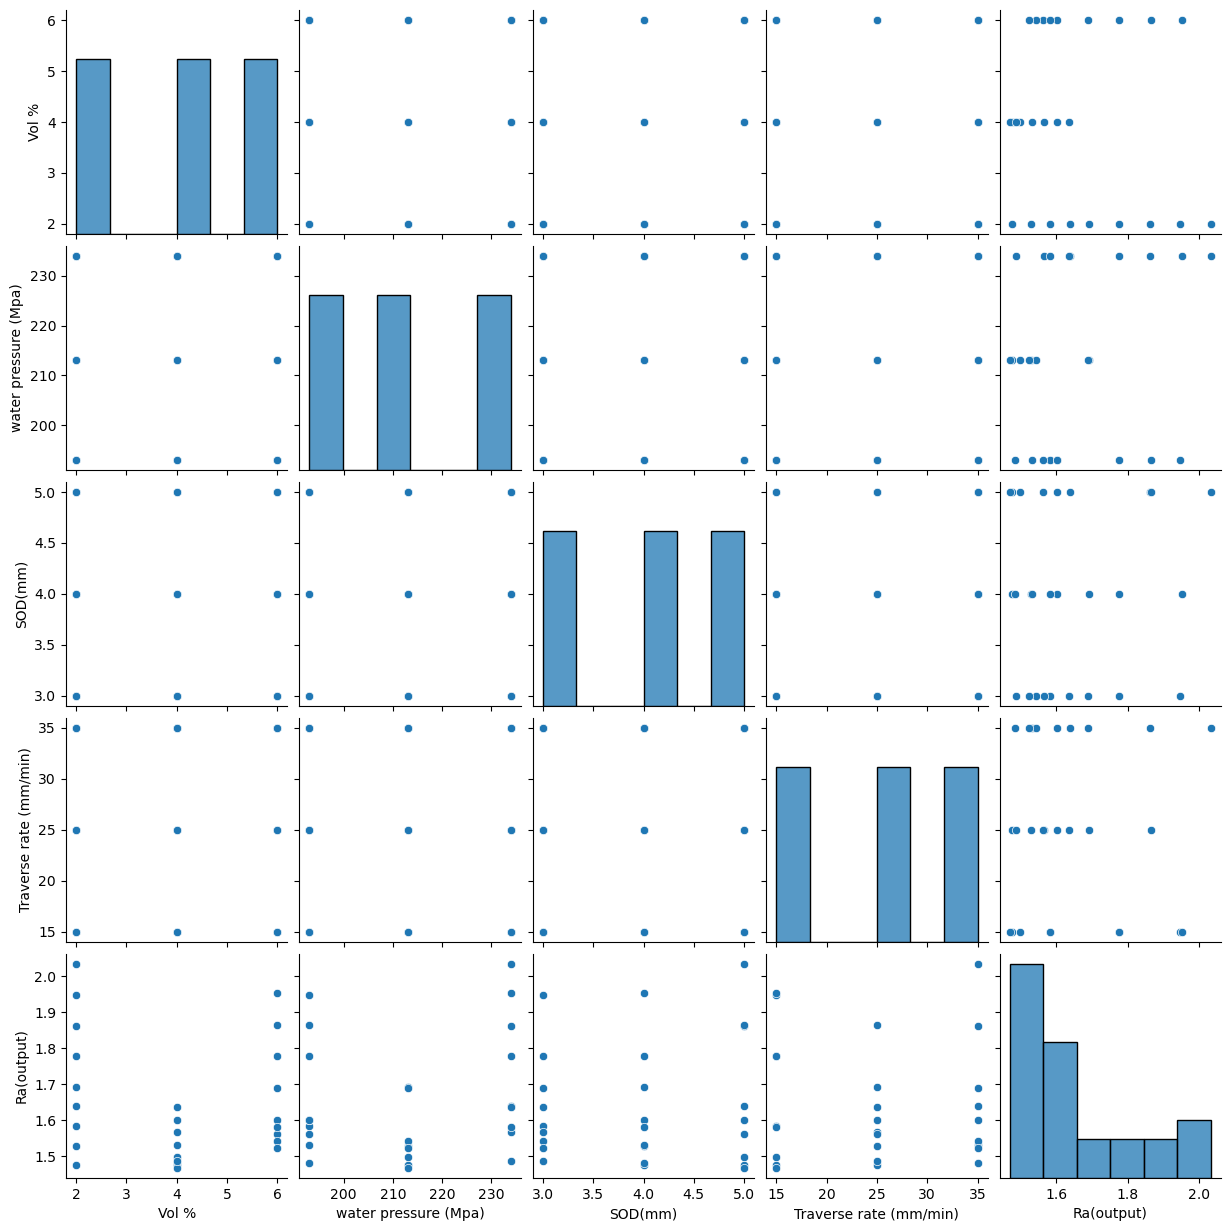

In [10]:
sns.pairplot(df1,palette="bright")
plt.show()

In [11]:
df1 = df.copy(deep=True)

In [12]:
df1['Mean_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('mean')
df1['Median_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('median')
df1['Max_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('max')
df1['Min_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('min')
df1['Std_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('std')

In [13]:
df1['Mean_Targ_SOD(mm)'] = df1.groupby('SOD(mm)')['Ra(output)'].transform('mean')
df1['Median_Targ_SOD(mm)'] = df1.groupby('SOD(mm)')['Ra(output)'].transform('median')
df1['Max_Targ_SOD(mm)'] = df1.groupby('SOD(mm)')['Ra(output)'].transform('max')
df1['Min_Targ_SOD(mm)'] = df1.groupby('SOD(mm)')['Ra(output)'].transform('min')
df1['Std_Targ_SOD(mm)'] = df1.groupby('SOD(mm)')['Ra(output)'].transform('std')


In [14]:
df1['Mean_Targ_water pressure (Mpa)'] = df1.groupby('water pressure (Mpa)')['Ra(output)'].transform('mean')
df1['Median_Targ_water pressure (Mpa)'] = df1.groupby('water pressure (Mpa)')['Ra(output)'].transform('median')
df1['Max_Targ_water pressure (Mpa)'] = df1.groupby('water pressure (Mpa)')['Ra(output)'].transform('max')
df1['Min_Targ_water pressure (Mpa)'] = df1.groupby('water pressure (Mpa)')['Ra(output)'].transform('min')
df1['Std_Targ_water pressure (Mpa)'] = df1.groupby('water pressure (Mpa)')['Ra(output)'].transform('std')

In [15]:
df1['Mean_Targ_Traverse rate (mm/min)'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('mean')
df1['Median_Targ_Traverse rate (mm/min)'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('median')
df1['Max_Targ_Traverse rate (mm/min)'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('max')
df1['Min_Targ_Traverse rate (mm/min)'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('min')
df1['Std_Targ_Traverse rate (mm/min)'] = df1.groupby('Traverse rate (mm/min)')['Ra(output)'].transform('std')

In [16]:
correlation_matrix= df.corr()

In [17]:
import pandas as pd

correlation_mask = correlation_matrix > 0.5

# Use the mask to filter the correlations
filtered_correlations = correlation_matrix[correlation_mask]

# Find the column names (variables) of correlations greater than 0.5
variable_pairs = [(var1, var2) for var1 in filtered_correlations.columns for var2 in filtered_correlations.index if var1 != var2]

# Print the resulting variable pairs with correlations greater than 0.5
l=[]
l1=[]
for var1, var2 in variable_pairs:
    correlation_coefficient = filtered_correlations.loc[var2, var1]
    if correlation_coefficient>0.5:
        #print(f"Correlation between {var1} and {var2}: {correlation_coefficient}")
        l.append(var1)
        l1.append(var2)
        


In [18]:
s1 = set(l)
s2 = set(l1)

In [19]:
s3 = s1.union(s2)

In [20]:
s3

set()

In [21]:
l4 = list(s3)

In [22]:
len(s3)

0

In [23]:
correlation_matrix = df1.corr()

In [24]:
samp = ['Sample_name', 'Vol %', 'water pressure (Mpa)', 'SOD(mm)',
       'Traverse rate (mm/min)', 'Ra(output)', 'Mean_Targ_Vol%',
       'Median_Targ_Vol%', 'Max_Targ_Vol%', 'Min_Targ_Vol%', 'Std_Targ_Vol%',
       'Mean_Targ_SOD(mm)', 'Median_Targ_SOD(mm)', 'Max_Targ_SOD(mm)',
       'Min_Targ_SOD(mm)', 'Std_Targ_SOD(mm)',
       'Mean_Targ_water pressure (Mpa)', 'Median_Targ_water pressure (Mpa)',
       'Max_Targ_water pressure (Mpa)', 'Min_Targ_water pressure (Mpa)',
       'Std_Targ_water pressure (Mpa)', 'Mean_Targ_Traverse rate (mm/min)',
       'Median_Targ_Traverse rate (mm/min)', 'Max_Targ_Traverse rate (mm/min)',
       'Min_Targ_Traverse rate (mm/min)', 'Std_Targ_Traverse rate (mm/min)']

In [25]:
len(samp)

26

In [26]:
new_columns = []
for i in samp:
    if i in l4:
        new_columns.append(i)
        

In [27]:
new_columns_rem = []
for i in samp:
    if i not in l4:
        new_columns_rem .append(i)
        
print(new_columns_rem)

['Sample_name', 'Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)', 'Ra(output)', 'Mean_Targ_Vol%', 'Median_Targ_Vol%', 'Max_Targ_Vol%', 'Min_Targ_Vol%', 'Std_Targ_Vol%', 'Mean_Targ_SOD(mm)', 'Median_Targ_SOD(mm)', 'Max_Targ_SOD(mm)', 'Min_Targ_SOD(mm)', 'Std_Targ_SOD(mm)', 'Mean_Targ_water pressure (Mpa)', 'Median_Targ_water pressure (Mpa)', 'Max_Targ_water pressure (Mpa)', 'Min_Targ_water pressure (Mpa)', 'Std_Targ_water pressure (Mpa)', 'Mean_Targ_Traverse rate (mm/min)', 'Median_Targ_Traverse rate (mm/min)', 'Max_Targ_Traverse rate (mm/min)', 'Min_Targ_Traverse rate (mm/min)', 'Std_Targ_Traverse rate (mm/min)']


In [28]:
print(len(new_columns))

0


In [29]:
df1.columns

Index(['Sample_name', 'Vol %', 'water pressure (Mpa)', 'SOD(mm)',
       'Traverse rate (mm/min)', 'Ra(output)', 'Mean_Targ_Vol%',
       'Median_Targ_Vol%', 'Max_Targ_Vol%', 'Min_Targ_Vol%', 'Std_Targ_Vol%',
       'Mean_Targ_SOD(mm)', 'Median_Targ_SOD(mm)', 'Max_Targ_SOD(mm)',
       'Min_Targ_SOD(mm)', 'Std_Targ_SOD(mm)',
       'Mean_Targ_water pressure (Mpa)', 'Median_Targ_water pressure (Mpa)',
       'Max_Targ_water pressure (Mpa)', 'Min_Targ_water pressure (Mpa)',
       'Std_Targ_water pressure (Mpa)', 'Mean_Targ_Traverse rate (mm/min)',
       'Median_Targ_Traverse rate (mm/min)', 'Max_Targ_Traverse rate (mm/min)',
       'Min_Targ_Traverse rate (mm/min)', 'Std_Targ_Traverse rate (mm/min)'],
      dtype='object')

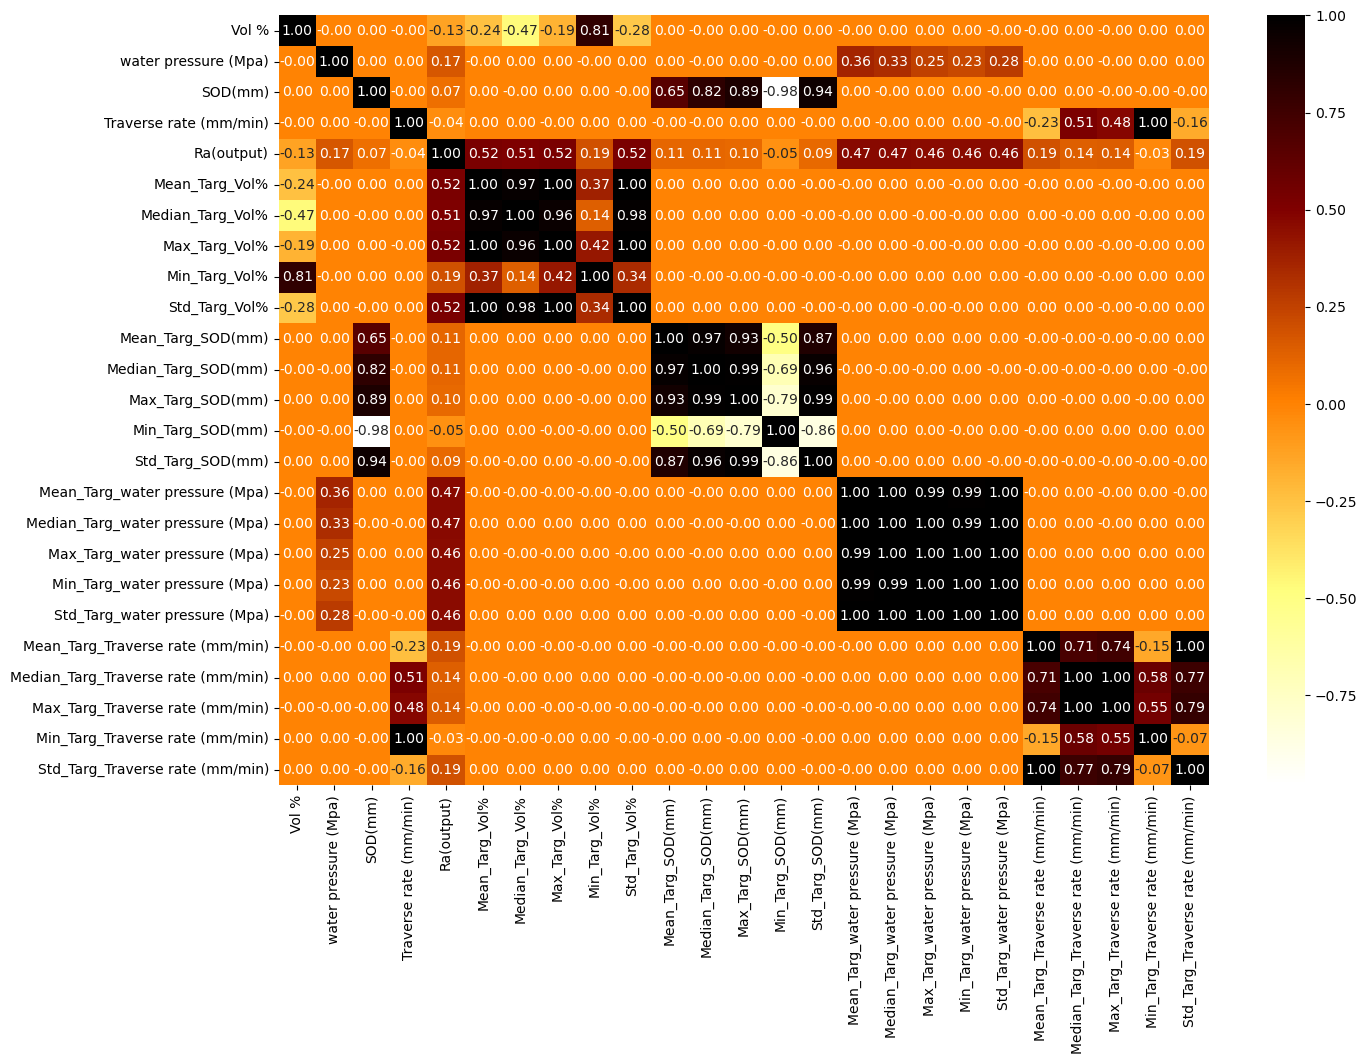

In [30]:
sns.heatmap(df1.corr(),annot=True,cmap='afmhot_r',fmt=".2f")
plt.show()

In [31]:
df1.head()

,Sample_name,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output),Mean_Targ_Vol%,Median_Targ_Vol%,Max_Targ_Vol%,Min_Targ_Vol%,...,Mean_Targ_water pressure (Mpa),Median_Targ_water pressure (Mpa),Max_Targ_water pressure (Mpa),Min_Targ_water pressure (Mpa),Std_Targ_water pressure (Mpa),Mean_Targ_Traverse rate (mm/min),Median_Targ_Traverse rate (mm/min),Max_Targ_Traverse rate (mm/min),Min_Targ_Traverse rate (mm/min),Std_Targ_Traverse rate (mm/min)
0,a,2,193,3,15,1.949,1.726667,1.692,2.035,1.474,...,1.661111,1.601,1.949,1.482,0.162111,1.673444,1.583,1.954,1.468,0.195428
1,a,2,193,3,15,1.777,1.726667,1.692,2.035,1.474,...,1.661111,1.601,1.949,1.482,0.162111,1.673444,1.583,1.954,1.468,0.195428
2,a,2,193,3,15,1.583,1.726667,1.692,2.035,1.474,...,1.661111,1.601,1.949,1.482,0.162111,1.673444,1.583,1.954,1.468,0.195428
3,a,2,213,4,25,1.692,1.726667,1.692,2.035,1.474,...,1.542889,1.522,1.692,1.468,0.087545,1.601000,1.566,1.865,1.474,0.120784
4,a,2,213,4,25,1.528,1.726667,1.692,2.035,1.474,...,1.542889,1.522,1.692,1.468,0.087545,1.601000,1.566,1.865,1.474,0.120784


In [32]:
from sklearn.preprocessing import MaxAbsScaler

mm = MaxAbsScaler()

In [33]:
df1[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']] = mm.fit_transform(df1[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']])

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Sample_name']=le.fit_transform(df['Sample_name'])

In [35]:
# Statistical Test

from scipy import stats
from scipy.stats import shapiro

for i in df1.columns:
    stat, p_value = stats.jarque_bera(df1[i])
    print(i,'=',p_value,'/',(p_value>0.05))

Sample_name = 0.28206295169381546 / True
Vol % = 0.28206295169381557 / True
water pressure (Mpa) = 0.2814976233207521 / True
SOD(mm) = 0.28206295169381534 / True
Traverse rate (mm/min) = 0.28206295169381557 / True
Ra(output) = 0.1243900696947482 / True
Mean_Targ_Vol% = 0.15048462505456084 / True
Median_Targ_Vol% = 0.27788614908113396 / True
Max_Targ_Vol% = 0.12833973766129547 / True
Min_Targ_Vol% = 0.10132405034333358 / True
Std_Targ_Vol% = 0.17133827587980566 / True
Mean_Targ_SOD(mm) = 0.20499920935395177 / True
Median_Targ_SOD(mm) = 0.09936044934510513 / True
Max_Targ_SOD(mm) = 0.09407495507193575 / True
Min_Targ_SOD(mm) = 0.20319008917902237 / True
Std_Targ_SOD(mm) = 0.12408633795858115 / True
Mean_Targ_water pressure (Mpa) = 0.21864882595140078 / True
Median_Targ_water pressure (Mpa) = 0.19728247988285874 / True
Max_Targ_water pressure (Mpa) = 0.15102724464879225 / True
Min_Targ_water pressure (Mpa) = 0.13672506091098735 / True
Std_Targ_water pressure (Mpa) = 0.16312245892934918 / 

* From the above result, we can see that the pvalue is greater than 0.05, we can say that the data is normally distributed

In [36]:
cols = ['Sample_name', 'Vol %', 'water pressure (Mpa)', 'SOD(mm)',
       'Traverse rate (mm/min)', 'Mean_Targ_Vol%',
       'Median_Targ_Vol%', 'Max_Targ_Vol%', 'Min_Targ_Vol%', 'Std_Targ_Vol%',
       'Mean_Targ_SOD(mm)', 'Median_Targ_SOD(mm)', 'Max_Targ_SOD(mm)',
       'Min_Targ_SOD(mm)', 'Std_Targ_SOD(mm)',
       'Mean_Targ_water pressure (Mpa)', 'Median_Targ_water pressure (Mpa)',
       'Max_Targ_water pressure (Mpa)', 'Min_Targ_water pressure (Mpa)',
       'Std_Targ_water pressure (Mpa)', 'Mean_Targ_Traverse rate (mm/min)',
       'Median_Targ_Traverse rate (mm/min)', 'Max_Targ_Traverse rate (mm/min)',
       'Min_Targ_Traverse rate (mm/min)', 'Std_Targ_Traverse rate (mm/min)']

In [37]:
# Two sample Ind Ttest
from scipy import stats

for i in cols:    
    teststats,pvalue = stats.ttest_ind(df1[i], df1['Ra(output)'])
    print(i,'=',pvalue,'/',(pvalue<0.05))

Sample_name = 0.0002435432522881199 / True
Vol % = 2.213601375157603e-21 / True
water pressure (Mpa) = 4.869521861606945e-27 / True
SOD(mm) = 1.0948824483438855e-24 / True
Traverse rate (mm/min) = 1.7187748458951065e-22 / True
Mean_Targ_Vol% = 1.0 / False
Median_Targ_Vol% = 0.1940286505507963 / False
Max_Targ_Vol% = 7.338711702419051e-06 / True
Min_Targ_Vol% = 1.3118793749396194e-05 / True
Std_Targ_Vol% = 3.794282872064698e-43 / True
Mean_Targ_SOD(mm) = 0.999999999999989 / False
Median_Targ_SOD(mm) = 0.09081222053405218 / False
Max_Targ_SOD(mm) = 4.8315750512031625e-14 / True
Min_Targ_SOD(mm) = 2.981701956285947e-06 / True
Std_Targ_SOD(mm) = 1.2966031613647928e-43 / True
Mean_Targ_water pressure (Mpa) = 1.0 / False
Median_Targ_water pressure (Mpa) = 0.09831639604787075 / False
Max_Targ_water pressure (Mpa) = 3.9768205812815905e-07 / True
Min_Targ_water pressure (Mpa) = 4.009180407044252e-06 / True
Std_Targ_water pressure (Mpa) = 1.8277360820573174e-43 / True
Mean_Targ_Traverse rate (mm

* Some Features are the not significant variables.

In [38]:
for i in cols:    
    teststats,pvalue = stats.pearsonr(df1[i], df1['Ra(output)'])
    print(i,'=',pvalue,'/',(pvalue>0.05))

Sample_name = 0.5341974353050339 / True
Vol % = 0.534197435305035 / True
water pressure (Mpa) = 0.3975669388648 / True
SOD(mm) = 0.7247741424089724 / True
Traverse rate (mm/min) = 0.8274412771037442 / True
Mean_Targ_Vol% = 0.0052909554748776615 / False
Median_Targ_Vol% = 0.007077071094497239 / False
Max_Targ_Vol% = 0.005355769919913725 / False
Min_Targ_Vol% = 0.3302901868695268 / True
Std_Targ_Vol% = 0.0053309115322729 / False
Mean_Targ_SOD(mm) = 0.588812022565679 / True
Median_Targ_SOD(mm) = 0.6000964269731701 / True
Max_Targ_SOD(mm) = 0.6169875740418641 / True
Min_Targ_SOD(mm) = 0.7884567796221587 / True
Std_Targ_SOD(mm) = 0.6389605085191693 / True
Mean_Targ_water pressure (Mpa) = 0.014227477124364849 / False
Median_Targ_water pressure (Mpa) = 0.014292376814123035 / False
Max_Targ_water pressure (Mpa) = 0.01496832265902004 / False
Min_Targ_water pressure (Mpa) = 0.015421455140604612 / False
Std_Targ_water pressure (Mpa) = 0.014699565274794007 / False
Mean_Targ_Traverse rate (mm/min) 

# Model Buliding

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sma

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample_name                         27 non-null     int32  
 1   Vol %                               27 non-null     float64
 2   water pressure (Mpa)                27 non-null     float64
 3   SOD(mm)                             27 non-null     float64
 4   Traverse rate (mm/min)              27 non-null     float64
 5   Ra(output)                          27 non-null     float64
 6   Mean_Targ_Vol%                      27 non-null     float64
 7   Median_Targ_Vol%                    27 non-null     float64
 8   Max_Targ_Vol%                       27 non-null     float64
 9   Min_Targ_Vol%                       27 non-null     float64
 10  Std_Targ_Vol%                       27 non-null     float64
 11  Mean_Targ_SOD(mm)                   27 non-null

In [41]:
x = df1.drop(columns=['Ra(output)','Sample_name'],axis=1)
y = df1['Ra(output)']

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(21, 24)
(6, 24)
(21,)
(6,)


In [43]:
temp_train = sma.add_constant(xtrain)
temp_test = sma.add_constant(xtest)

In [44]:
model_1 = sma.OLS(ytrain,temp_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ra(output)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1.825
Date:                Sat, 22 Jul 2023   Prob (F-statistic):              0.168
Time:                        16:06:58   Log-Likelihood:                 16.998
No. Observations:                  21   AIC:                            -16.00
Df Residuals:                      12   BIC:                            -6.594
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0333      0.253     -0.132      0.897      -0.584       0.517
Vol %                                 -0.1010      0.122     -0.827      0.424      -0.367       0.165
water pressure (Mpa)                   0.2332      0.466      0.501      0.626      -0.782       1.248
SOD(mm)                                0.1341      0.405      0.331      0.746      -0.749       1.017
Traverse rate (mm/min)                -0.0895      0.137     -0.656      0.524      -0.387       0.208
Mean_Targ_Vol%                         0.1142      0.132      0.867      0.403      -0.173       0.401
Median_Targ_Vol%                       0.0970      0.171      0.568      0.581      -0.275       0.469
Max_Targ_Vol%                          0.2814      0.183      1.536      0.150      -0.118       0.680
Min_Targ_Vol%                         -0.0273      0.309     -0.088      0.931      -0.701       0.646
Std_Targ_Vol%                          0.1056      0.161      0.658      0.523      -0.244       0.455
Mean_Targ_SOD(mm)                     -0.2517      0.698     -0.360      0.725      -1.773       1.270
Median_Targ_SOD(mm)                   -0.1261      0.092     -1.378      0.193      -0.325       0.073
Max_Targ_SOD(mm)                      -0.3091      0.961     -0.322      0.753      -2.404       1.785
Min_Targ_SOD(mm)                      -0.0783      0.256     -0.307      0.764      -0.635       0.478
Std_Targ_SOD(mm)                      -0.1121      0.625     -0.179      0.861      -1.474       1.249
Mean_Targ_water pressure (Mpa)         0.1705      0.108      1.572      0.142      -0.066       0.407
Median_Targ_water pressure (Mpa)       0.0869      0.196      0.443      0.666      -0.341       0.515
Max_Targ_water pressure (Mpa)          0.3197      0.201      1.588      0.138      -0.119       0.758
Min_Targ_water pressure (Mpa)         -0.0297      0.343     -0.087      0.932      -0.778       0.718
Std_Targ_water pressure (Mpa)          0.1117      0.149      0.748      0.469      -0.214       0.437
Mean_Targ_Traverse rate (mm/min)       0.1630      0.199      0.821      0.428      -0.270       0.596
Median_Targ_Traverse rate (mm/min)     0.0333      0.280      0.119      0.907      -0.576       0.642
Max_Targ_Traverse rate (mm/min)        0.3644      0.343      1.064      0.308      -0.382       1.111
Min_Targ_Traverse rate (mm/min)       -0.0473      0.364     -0.130      0.899      -0.840       0.745
Std_Targ_Traverse rate (mm/min)        0.2278      0.323      0.706      0.494      -0.475       0.931
==============================================================================
Omnibus:                        0.112   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.946   J

**Model Assumptions**
* **Linearity** : That there should be a linear pattern between the predictors and target ** Statistical test : rainbow Test**
* **Normality** : That the model residuals should be normal ** Statisticak Test : Jarque bera test**
* **Multicollinearity** : All the predictors should not be highly correlated, ** Statistical test : Correlation,condition NO & VIF**
* **Autocorrelation of Errors**: the error should not be correlated ** Statistical Test: Durbin Watson Test the Range of DW test is between 0-4 where is the ideal value is 2 and tolerance range 1.5-2.5
* **Heteroscedasticity** : That the data has unequal variance , Statistical Test : Breusch Pagan Test

In [45]:
# Create the machine instance

lr = LinearRegression()

pred_train = lr.fit(xtrain,ytrain).predict(xtrain) #to compare the error in train and test
pred_test = lr.fit(xtrain,ytrain).predict(xtest)

# R2Score

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
print(r2_train)
print(r2_test) 

# Check the error
print("MSE Train : ",mean_squared_error(ytrain,pred_train))
print('MSE Test : ',mean_squared_error(ytest,pred_test))

print("RMSR Train : ",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSR Test : ",np.sqrt(mean_squared_error(ytest,pred_test)))

0.548831839216979
0.1661384751340319
MSE Train :  0.011600664914833119
MSE Test :  0.021962152190639326
RMSR Train :  0.10770638288807734
RMSR Test :  0.1481963298824884


In [72]:
x = df.drop(columns=['Ra(output)'],axis=1)
y = df['Ra(output)']

In [73]:
lr.fit(x,y)

LinearRegression()

In [74]:
lr.coef_

array([-0.01247222,  0.00165028,  0.01416667, -0.00087778])

In [75]:
lr.intercept_

1.3065518988457132

In [76]:
df.columns

Index(['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)',
       'Ra(output)'],
      dtype='object')

In [78]:
df.head(10)

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,2,193,3,15,1.949
1,2,193,3,15,1.777
2,2,193,3,15,1.583
3,2,213,4,25,1.692
4,2,213,4,25,1.528
5,2,213,4,25,1.474
6,2,234,5,35,2.035
7,2,234,5,35,1.863
8,2,234,5,35,1.639
9,4,193,4,35,1.601


In [82]:
df.describe()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.000000,27.00000,27.000000,27.000000
mean,4.000000,213.333333,4.00000,25.000000,1.643444
std,1.664101,17.058722,0.83205,8.320503,0.165939
min,2.000000,193.000000,3.00000,15.000000,1.468000
25%,2.000000,193.000000,3.00000,15.000000,1.525000
50%,4.000000,213.000000,4.00000,25.000000,1.583000
75%,6.000000,234.000000,5.00000,35.000000,1.734500
max,6.000000,234.000000,5.00000,35.000000,2.035000


In [80]:
df.value_counts()

Vol %  water pressure (Mpa)  SOD(mm)  Traverse rate (mm/min)  Ra(output)
2      193                   3        15                      1.583         1
4      213                   5        15                      1.497         1
6      234                   4        15                      1.777         1
                                                              1.581         1
       213                   3        35                      1.689         1
                                                              1.541         1
                                                              1.522         1
       193                   5        25                      1.865         1
                                                              1.601         1
                                                              1.561         1
4      234                   3        25                      1.636         1
                                                              1.566  

In [105]:
def create_dataset():
    names = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)','Ra(output)']
    df = pd.DataFrame([], columns=names)
    total = 0
    while total < 300:
        total += 1 
        
        
        import random
        num1 = 0
        num1 = random.randint(2,6)      
        num2 = random.randint(193,234)
        num3 = random.randint(3,5)    
        num4 = random.randint(15,35)
        
        cir1 = -0.01247222
        cir2 = 0.00165028
        cir3 = 0.01416667
        cir4 = -0.00087778
        cir_i1 = 1.3065518988457132

        CIR = 0
        CIR = num1*cir1
        CIR = CIR + num3*cir2
        CIR = CIR + num4*cir3
        CIR = CIR + cir_i1
        CIR = round(CIR, 6)

   
        I1 = num1
        I2 = num2
        I3 = num3
        I4 = num4
        
        Target1 = CIR
                       
        vector = [I1,I2,I3,I4,Target1]
        
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        
    return df

In [106]:
s = create_dataset()

In [107]:
pd.set_option('display.max_rows',None)

In [109]:
s.shape

(300, 5)

In [108]:
s

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,2,220,5,28,1.686526
0,4,204,3,17,1.502447
0,4,220,4,35,1.759098
0,5,208,5,30,1.677442
0,5,198,3,32,1.702475
0,2,203,3,17,1.527392
0,6,201,5,21,1.537470
0,4,204,4,20,1.546598
0,4,200,4,27,1.645764
0,3,213,5,26,1.645720


In [46]:
from sklearn.linear_model import Ridge,Lasso

In [47]:
ridge = Ridge(alpha=10) 
pred_ridge = ridge.fit(x,y).predict(xtest)

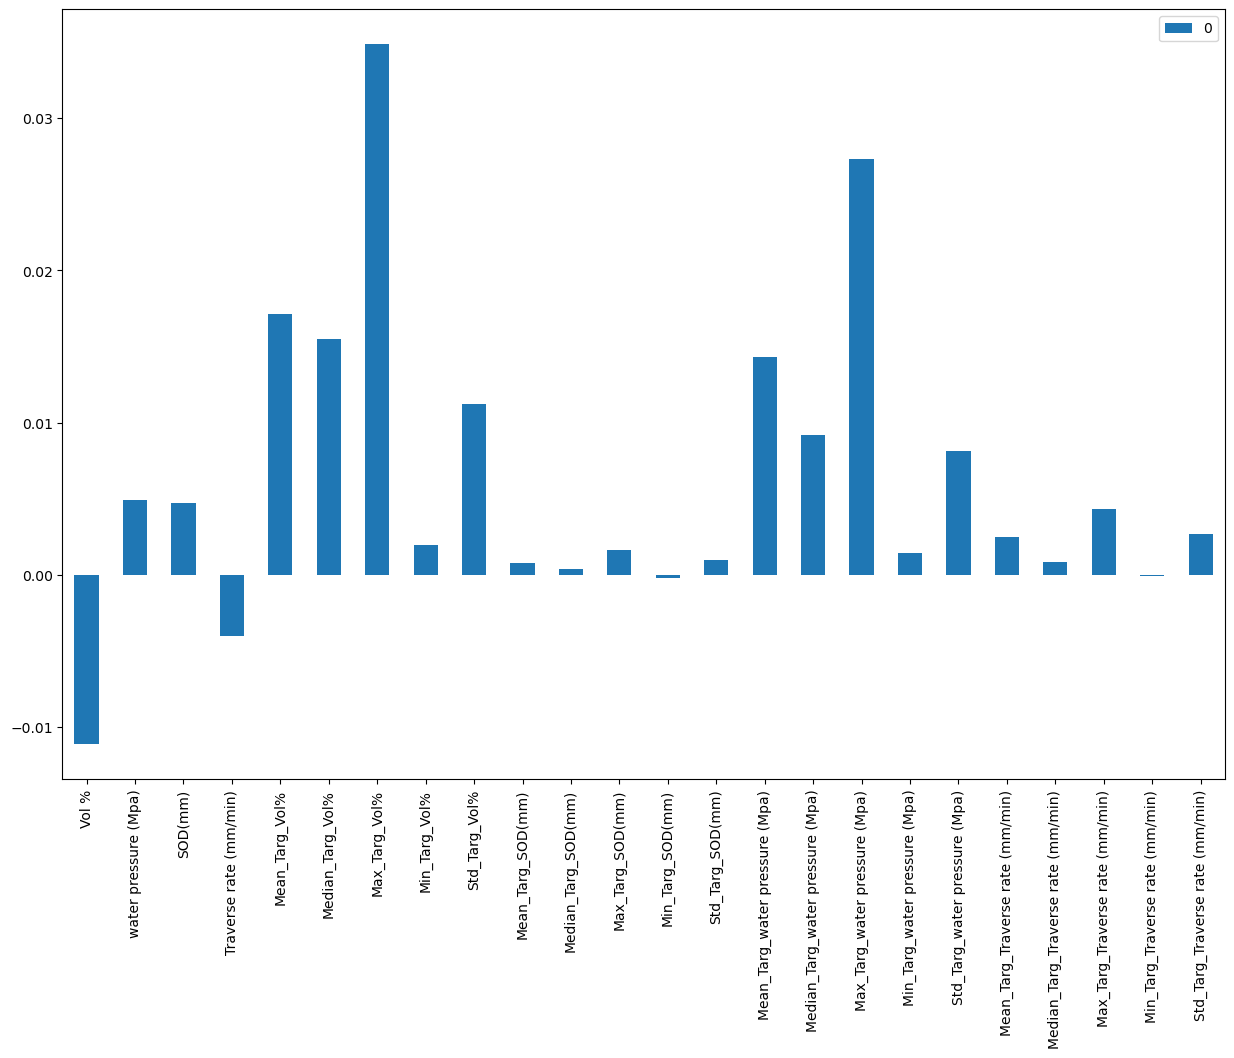

In [48]:
pd.DataFrame(ridge.coef_,x.columns).plot(kind='bar')
plt.show()

In [49]:
rd = Ridge()

pred_train = rd.fit(xtrain,ytrain).predict(xtrain) #to compare the error in train and test
pred_test = rd.fit(xtrain,ytrain).predict(xtest)

# R2Score

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
print(r2_train)
print(r2_test) 

# Check the error
print("MSE Train : ",mean_squared_error(ytrain,pred_train))
print('MSE Test : ',mean_squared_error(ytest,pred_test))

print("RMSR Train : ",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSR Test : ",np.sqrt(mean_squared_error(ytest,pred_test)))

0.365353794438558
0.16655764631446357
MSE Train :  0.01631834559737323
MSE Test :  0.02195111210666369
RMSR Train :  0.12774328004781008
RMSR Test :  0.1481590770309524


In [50]:
#Non parametric model

from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt = DecisionTreeRegressor(random_state = 0) 
  
pred_train = dt.fit(xtrain,ytrain).predict(xtrain) #to compare the error in train and test
pred_test = dt.fit(xtrain,ytrain).predict
(xtest)

# R2Score

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
print(r2_train)
print(r2_test) 

# Check the error
print("MSE Train : ",mean_squared_error(ytrain,pred_train))
print('MSE Test : ',mean_squared_error(ytest,pred_test))

print("RMSR Train : ",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSR Test : ",np.sqrt(mean_squared_error(ytest,pred_test)))

0.5488320797487234
0.1658958787720266
MSE Train :  0.011600658730158734
MSE Test :  0.02196854166666667
RMSR Train :  0.10770635417726632
RMSR Test :  0.1482178857853082


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(random_state = 0) 
  
pred_train = rf.fit(xtrain,ytrain).predict(xtrain) #to compare the error in train and test
pred_test = rf.fit(xtrain,ytrain).predict(xtest)

# R2Score

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
print(r2_train)
print(r2_test) 

# Check the error
print("MSE Train : ",mean_squared_error(ytrain,pred_train))
print('MSE Test : ',mean_squared_error(ytest,pred_test))

print("RMSR Train : ",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSR Test : ",np.sqrt(mean_squared_error(ytest,pred_test)))

0.5345265827858099
0.17155374897814046
MSE Train :  0.011968488934353337
MSE Test :  0.02181952530983029
RMSR Train :  0.10940058927790718
RMSR Test :  0.14771433684592125


# -----

In [53]:
from sklearn.svm import SVR

In [54]:
lr   = LinearRegression()
dt   = DecisionTreeRegressor(random_state=10)
rf   = RandomForestRegressor(random_state=10)
svm = SVR(kernel='linear')

In [55]:
l1 = [lr,dt,rf,svm]

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

def models(mod, xtrain, ytrain, xtest, ytest):
    l = [str(mod).split('(')[0]]
    model1 = mod.fit(xtrain, ytrain)
    ypred_train = model1.predict(xtrain)
    ypred = model1.predict(xtest)
    
    l.append(model1.score(xtrain, ytrain))  # Training accuracy
    l.append(model1.score(xtest, ytest))    # Testing accuracy
    
    l.append(round(r2_score(ytest, ypred),3))
    l.append(round(mean_squared_error(ytrain, ypred_train), 2)) 
    l.append(round(mean_squared_error(ytest, ypred), 2))        # mse test  
    l.append(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 2))
    l.append(round(np.sqrt(mean_squared_error(ytest, ypred)), 2))  # rmse test
    
    return l

In [57]:
best = pd.DataFrame(columns = ['Model','Train_ACC','Test_ACC','r2_score',"MSE_train","MSE_test",'RMSE_train','RMSE_test'])

In [58]:
perf1 = models(lr,xtrain,ytrain,xtest,ytest)
perf2 = models(dt,xtrain,ytrain,xtest,ytest)
perf3 = models(rf,xtrain,ytrain,xtest,ytest)
perf4 = models(svm,xtrain,ytrain,xtest,ytest)

In [59]:
best.loc[len(best)] = perf1
best.loc[len(best)] = perf2
best.loc[len(best)] = perf3
best.loc[len(best)] = perf4

In [60]:
best

,Model,Train_ACC,Test_ACC,r2_score,MSE_train,MSE_test,RMSE_train,RMSE_test
0,LinearRegression,0.548832,0.166138,0.166,0.01,0.02,0.11,0.15
1,DecisionTreeRegressor,0.548832,0.165896,0.166,0.01,0.02,0.11,0.15
2,RandomForestRegressor,0.543555,0.164751,0.165,0.01,0.02,0.11,0.15
3,SVR,0.351416,0.287815,0.288,0.02,0.02,0.13,0.14


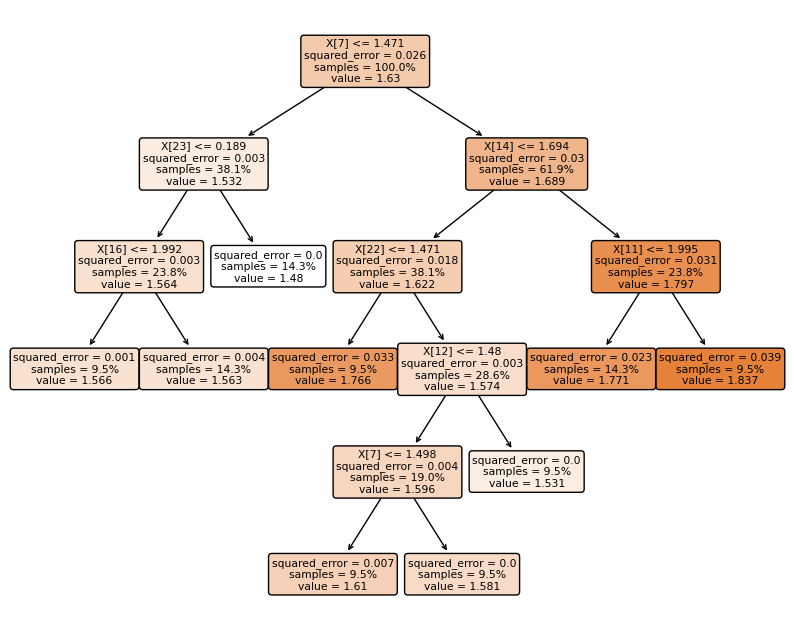

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plot_tree(dt,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True)
plt.show()